# **Практична робота №1**

Виконав: *Черевач Юрій Анатолійович,* МІТ-31

**Завдання 1-2:** Створіть матрицю ознак `X` та вектор цільової змінної `y`. Ознаки можуть бути числовими та категорійними. Згенеруйте випадкові дані, що відповідають "одобрено" (клас 1) та "відхилено" (клас 0) кредитних заявок.


In [695]:
import numpy as np
import pandas as pd

num_samples = 6000
num_features = 3

columns = ['Income', 'Credit Rating', 'Credit Class']
income = np.random.randint(5000, 100000, size=(num_samples, 1)) #feature 1 - income
credit_rating_score = np.random.randint(1, 1000, size=(num_samples, 1)) #feature 2 - credit rating

def calculate_category(income, credit_rating_score):
    l_f = income / 10000
    m_f = credit_rating_score / 100
    l = np.log10(l_f)
    m = np.log10(m_f)
    
    x = (3 * l + 7 * m) / 10
    vector_category = np.where(x > 0.48, 1, 0)

    return vector_category

vector_category = calculate_category(income, credit_rating_score)

matrix_features = np.column_stack((income, credit_rating_score, vector_category)) #matric of features

data = pd.DataFrame(data=matrix_features, columns=columns) #dataframe
data.to_csv("random_data.csv", index=False) #saving dataframe to csv file

print("Matrix of features X: ")
print(matrix_features[:5], '\n')

print("Vector of the target variable Y: ")
print(vector_category[:5], '\n')

print(data)


Matrix of features X: 
[[41810   734     1]
 [ 6652   756     1]
 [67283   662     1]
 [32673   388     1]
 [12013    50     0]] 

Vector of the target variable Y: 
[[1]
 [1]
 [1]
 [1]
 [0]] 

      Income  Credit Rating  Credit Class
0      41810            734             1
1       6652            756             1
2      67283            662             1
3      32673            388             1
4      12013             50             0
...      ...            ...           ...
5995   71651            240             1
5996   33693            922             1
5997   37535            629             1
5998   84405            925             1
5999   46579            625             1

[6000 rows x 3 columns]


За допомогою модуля `random` бібліотеки `numpy` я згенерував кілька масивів даних. Перший з них містить дані про дохід, які згенеровано псевдовипадковим чином в діапазоні від 5 000 до 100 000. Другий має згенеровані дані про кредитний рейтинг подавача від 1 до 1 000. Третій - вектор, який обирає, кому кредит одобрювати, а кому ні, пропускаючи дані через функцію. 
>Я реалізував цю функцію, щоб дані в кінці виглядали більш впорядкованими та логічними. Параметри там випадкові, орієнтувався на приємну для ока та логічну візуалізацію

З цих даних я створюю `matrix_features` - матрицю ознак, і, власне, виводжу її на екран. Також за допомогою бібліотеки `pandas` я створив датафрейм і зберіг його у .csv форматі. Далі - вивід даних + датафрейм для зручності.

**Завдання 3:** Розділіть дані на тренувальний та тестовий набори. 

In [696]:
from sklearn.model_selection import train_test_split

X = data[["Income", "Credit Rating"]] 
Y = data["Credit Class"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.5)


**Завдання 4-5:** Виберіть модель класифікації з бібліотеки scikit-learn (наприклад, метод опорних векторів, логістична регресія або дерево рішень) та навчіть модель на тренувальних даних. Оцініть точність моделі на тестовому наборі даних та побудуйте матрицю неправильно класифікованих прикладів та звіт про класифікацію.

In [697]:
from sklearn.tree import DecisionTreeClassifier #import Desicion Tree

dt_model = DecisionTreeClassifier() #create a model
dt_model.fit(X_train, y_train) #train model

y_pred = dt_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) #accuracy classification score
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred) #text report showing the main classification metrics
print('Classification Report:')
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       455
           1       1.00      1.00      1.00      1345

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800



Я використав для класифікації **"дерево рішень"**. Після створення моделі та її тренування, я обрахував точність класифікації та вивів звіт про класифікацію.

**Завдання 6:**  Використайте бібліотеку Matplotlib для візуалізації результатів. Наприклад, побудуйте графік розподілу кредитів за категоріями "одобрено" та "відхилено".

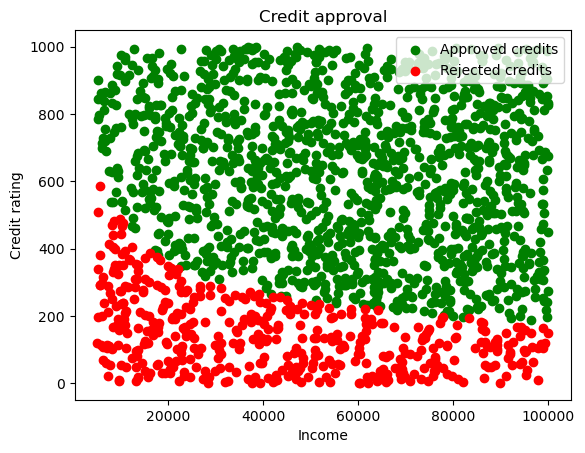

In [699]:
import matplotlib.pyplot as plt

approved_category = X_test[y_test == 1]
rejected_category = X_test[y_test == 0]

#plot for "approved" credits
plt.scatter(approved_category.iloc[:, 0], approved_category.iloc[:, 1], label='Approved credits',  c='green', marker='o')

#plot for "rejected" credits
plt.scatter(rejected_category.iloc[:, 0], rejected_category.iloc[:, 1], label='Rejected credits', c='red', marker='o')

plt.title('Credit approval')
plt.xlabel('Income')
plt.ylabel('Credit rating')
plt.legend(loc='upper right')
plt.show()